In [1]:
import os, sys
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from data.generated.generated_data import get_large_num_features_dataset
import common_grid_search_analysis
import SVMs.common_SVM as common_SVM
import TrainingCurves
from sklearn.model_selection import ShuffleSplit

from sklearn import svm

In [2]:
PLOT_PREFIX = "Figures/LARGE_NUM_FEATURES_SVM_TEST_"
GLOBAL_FIG_COUNTER = 0

GS_FILE_NAME_PREFIX = "Analysis_Data/LARGE_NUM_FEATURES_NONLINEAR_SVM"

In [3]:
# Load Data
X_train, X_test, y_train, y_test = get_large_num_features_dataset()
num_features = X_train.shape[1]

In [4]:
# Start with Learning Curve on Default Classifier
train_sizes, train_scores, test_scores, fit_times = TrainingCurves.perform_learning_curve(svm.SVC(), X_train, y_train, "accuracy")

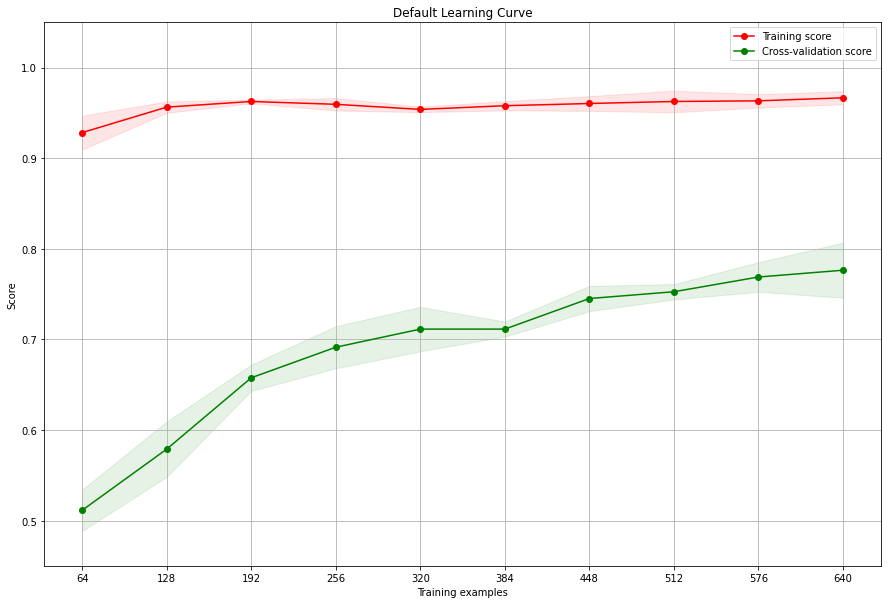

In [5]:
ylim=(0.45, 1.05)
TrainingCurves.plot_learning_curve(train_scores, test_scores, train_sizes, "Default Learning Curve", ylim=ylim)

In [ ]:
C = [i for i in range(1, 15)]
gamma = [i for i in range(1, 10)]
# gamma = [0.1, 0.01, 0.001] + gamma
kernel = ["linear", "rbf", "poly"]
degree = [3, 4]
parameters = {"kernel": kernel, 'C': C, 'gamma': gamma}

gs = common_SVM.perform_grid_search(parameters, X_train, y_train,scoring='balanced_accuracy', GS_FILE_NAME_PREFIX=GS_FILE_NAME_PREFIX)

gs_results = gs

In [ ]:
unused_params_values = {'gamma': 1, 'C': 1}
common_grid_search_analysis.plot_grid_search_model_complexity(gs_results, PLOT_PREFIX)

In [ ]:
common_grid_search_analysis.plot_grid_search_training_times(gs_results, PLOT_PREFIX)

In [ ]:
common_grid_search_analysis.plot_grid_search_model_complexity_and_training(gs_results, PLOT_PREFIX)

In [ ]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
gamma = [i for i in range(1, 20, 2)]
C = [i for i in range(1, 20, 2)]
estimator = svm.SVC(kernel='rbf')

train_scores_mean_gamma, train_scores_std_gamma, test_scores_mean_gamma, test_scores_std_gamma = \
    TrainingCurves.perform_validation_curve(estimator, X_train, y_train, "gamma", gamma, 'balanced_accuracy', cv=cv)


